# Import all required libraries

In [1]:
import pandas as pd

import warnings
warnings.simplefilter('ignore')
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.impute import SimpleImputer

Matplotlib is building the font cache; this may take a moment.


# Read file using pandas

In [20]:
df=pd.read_csv(r"data.csv")
df

,x1,x2,y
0,-119.366669,1.150000e+02,1
1,-101.108044,9.777716e+01,1
2,-130.278658,1.067677e+02,1
3,-114.703415,1.011955e+02,1
4,-119.366669,1.150000e+02,1
...,...,...,...
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0


calculate mean,std, min ,max 

In [21]:
df.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


# check missing values in columns

In [23]:
df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

# Count occurence of values

In [24]:
df['x1'].value_counts()

-118.366669    8
 31.633331     6
 30.633331     5
 78.633331     5
-86.366669     5
              ..
 58.434396     1
 18.408090     1
-99.593049     1
-72.501026     1
 54.003740     1
Name: x1, Length: 1887, dtype: int64

# Deal with missing values using fillna function in pandas

In [26]:
df['x1']=df['x1'].fillna(df['x1'].mean())
df['x1']

0      -119.366669
1      -101.108044
2      -130.278658
3      -114.703415
4      -119.366669
           ...    
2222     98.714112
2223     96.633331
2224     85.673940
2225     78.958862
2226    109.624009
Name: x1, Length: 2227, dtype: float64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2227 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [28]:
df['x2'].value_counts()

-55.000000     7
-113.000000    7
 115.000000    6
-119.000000    6
 126.000000    6
              ..
-126.943566    1
-130.800339    1
-114.715946    1
-80.804223     1
 12.982108     1
Name: x2, Length: 1884, dtype: int64

# Detect Outliers

<AxesSubplot:xlabel='x1'>

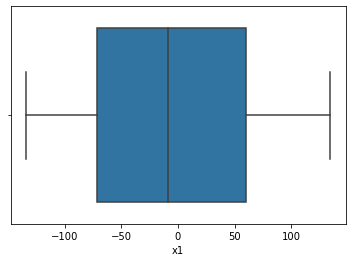

In [30]:
sn.boxplot(df['x1'])

<AxesSubplot:xlabel='x2'>

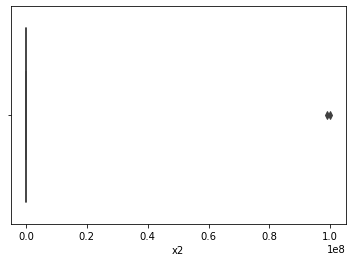

In [31]:
sn.boxplot(df['x2'])

# MODELS

# Logistic Regression


In [32]:
x=df[['x1','x2']]
y=df['y']

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [35]:
from sklearn.linear_model import LogisticRegression
l=LogisticRegression()
l.fit(x_train,y_train)

LogisticRegression()

In [36]:
yp=l.predict(x_test)

In [37]:
l.score(x_train,y_train)

0.5648512071869736

In [38]:
l.score(x_test,y_test)

0.5650224215246636

In [39]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,yp)
cm

array([[229,  13],
       [181,  23]], dtype=int64)

<AxesSubplot:>

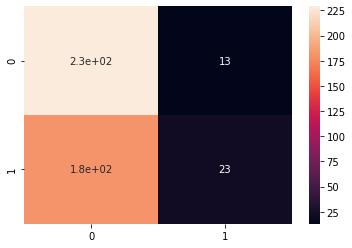

In [40]:
sn.heatmap(cm,annot=True)

# SVM with Linear Kernel


In [41]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [42]:
yp1=svm.predict(x_test)

In [43]:
svm.score(x_train,y_train)

0.5614823133071308

In [44]:
svm.score(x_test,y_test)

0.5426008968609866

In [45]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,yp1)
cm1

array([[242,   0],
       [204,   0]], dtype=int64)

<AxesSubplot:>

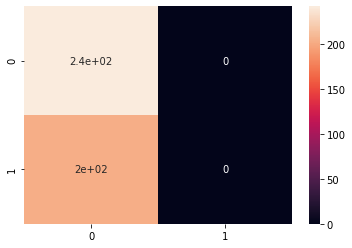

In [46]:
sn.heatmap(cm1,annot=True)

# SVM with RBF Kernel

In [47]:
from sklearn.svm import SVC
svm1=SVC(kernel='rbf')
svm1.fit(x_train,y_train)

SVC()

In [48]:
yp2=svm.predict(x_test)

In [49]:
svm1.score(x_train,y_train)

0.5614823133071308

In [50]:
svm1.score(x_test,y_test)

0.5426008968609866

In [51]:
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_test,yp2)
cm2

array([[242,   0],
       [204,   0]], dtype=int64)

<AxesSubplot:>

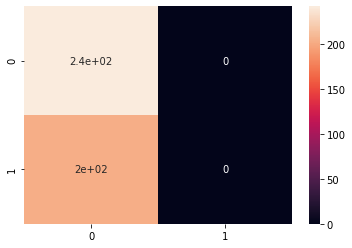

In [52]:
sn.heatmap(cm2,annot=True)

# Decision Tree


In [53]:
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier()
dec.fit(x_train,y_train)

DecisionTreeClassifier()

In [54]:
yp3=dec.predict(x_test)
yp3

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,

In [55]:
dec.score(x_test,y_test)

0.9282511210762332

In [56]:
from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(y_test,yp3)
cm3

array([[228,  14],
       [ 18, 186]], dtype=int64)

<AxesSubplot:>

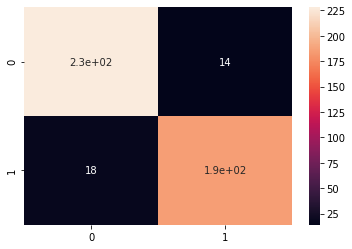

In [57]:
sn.heatmap(cm3,annot=True)

# KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [59]:
y_pred = classifier.predict(x_test)

In [60]:
classifier.score(x_test,y_test)

0.9461883408071748

In [61]:
classifier

KNeighborsClassifier(n_neighbors=3)

In [62]:
from sklearn.metrics import confusion_matrix
cm4=confusion_matrix(y_test,y_pred)
cm4

array([[231,  11],
       [ 13, 191]], dtype=int64)

<AxesSubplot:>

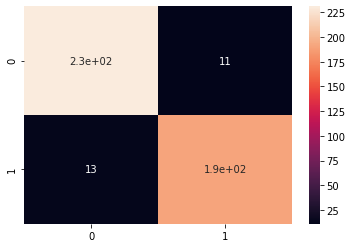

In [63]:
sn.heatmap(cm4,annot=True)

<AxesSubplot:xlabel='y', ylabel='count'>

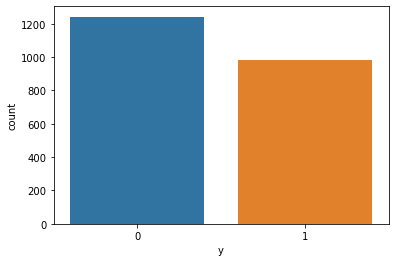

In [64]:
sn.countplot(df['y'])